In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [63]:
iris = load_iris()

In [64]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [65]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
X= df.drop(["species"],axis="columns")
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

In [70]:
DTmodel = DecisionTreeClassifier()
DTmodel.fit( X_train_scaled,y_train )

DecisionTreeClassifier()

In [71]:
y_pred = DTmodel.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
depth = DTmodel.get_depth()
leaves = DTmodel.get_n_leaves()
cm=confusion_matrix(y_test,y_pred)

In [72]:
print("Decision Tree")
print(f"Accuracy:{accuracy*100:.2f}")
print(f"Depth:{depth}")
print(f"Leaves:{leaves}")
print("Confusion Matrix:",cm)

Decision Tree
Accuracy:100.00
Depth:6
Leaves:10
Confusion Matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(50.722222222222214, 0.5, 'Actual')

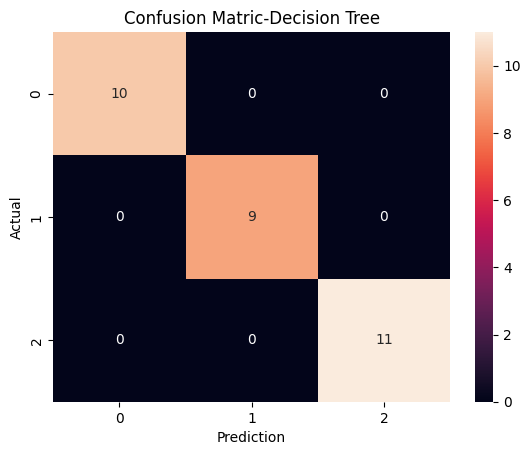

In [73]:
sns.heatmap(cm,annot=True)
plt.title("Confusion Matric-Decision Tree")
plt.xlabel("Prediction")
plt.ylabel("Actual")

[Text(0.3076923076923077, 0.9285714285714286, 'petal_length <= -0.732\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'petal_length <= 0.586\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal_width <= 0.623\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = verginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal_width <= 0.756\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = verginica'),
 Text(0.384

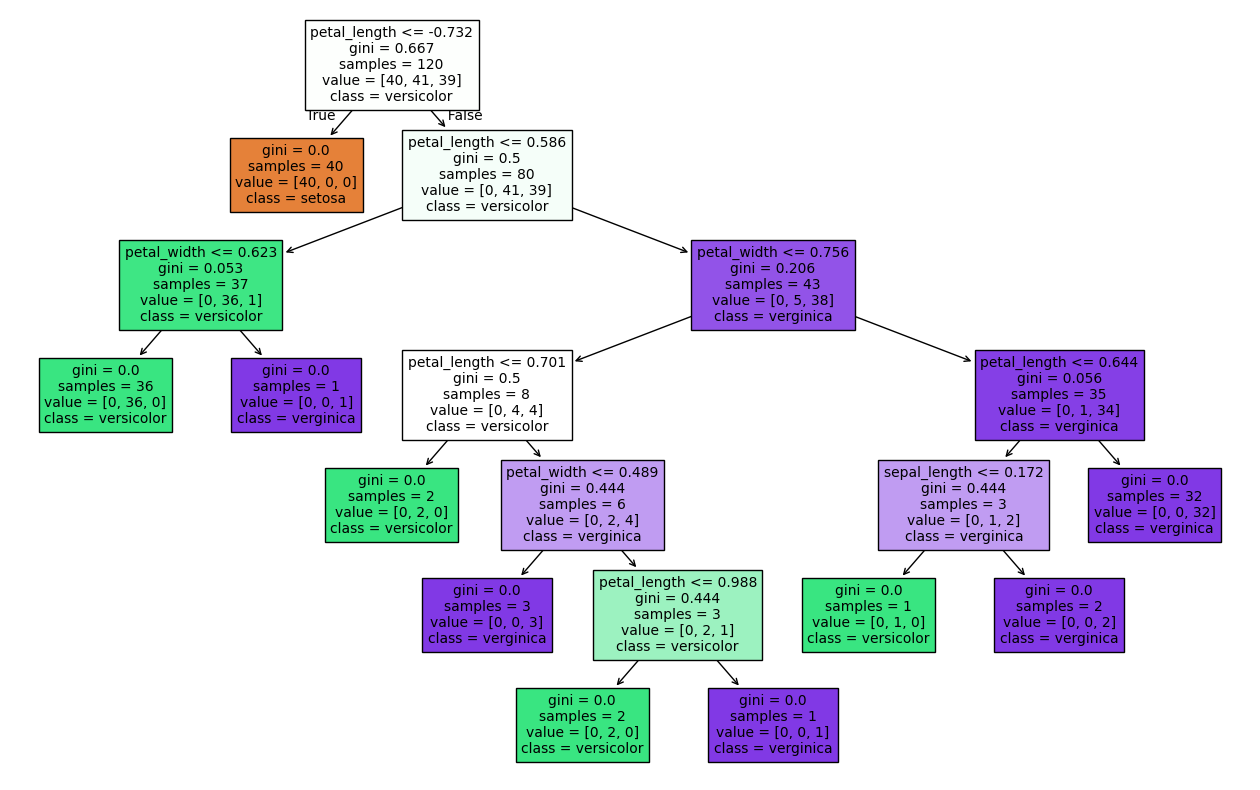

In [74]:
plt.figure(figsize=(16,10))
plot_tree(DTmodel,feature_names=X.columns,class_names=["setosa","versicolor","verginica"],fontsize=10,filled=True)

In [75]:
Fmodel = RandomForestClassifier(n_estimators=100)
Fmodel.fit( X_train_scaled,y_train )

RandomForestClassifier()

In [76]:
y1_pred = Fmodel.predict(X_test_scaled)
Accuracy= accuracy_score(y_test,y1_pred)
Depth = [t.get_depth() for t in Fmodel.estimators_]
avg_depth = sum(Depth)/len(Depth)
cm1=confusion_matrix(y_test,y1_pred)

In [77]:
print("Random Forest")
print(f"Accuracy:{Accuracy*100:.2f}")
print(f"Depth:{avg_depth}")
print("Confusion Matrix:",cm1)

Random Forest
Accuracy:100.00
Depth:5.53
Confusion Matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(50.722222222222214, 0.5, 'Actual')

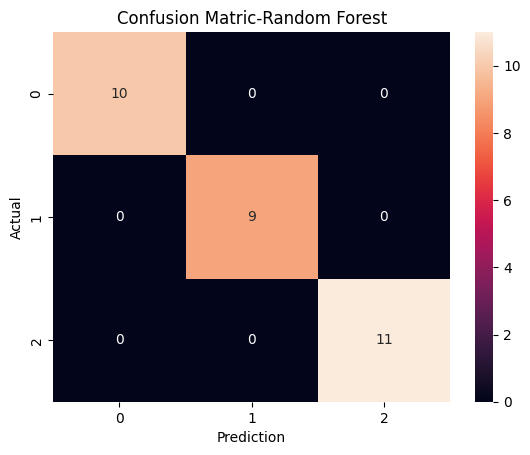

In [78]:
sns.heatmap(cm1,annot=True)
plt.title("Confusion Matric-Random Forest")
plt.xlabel("Prediction")
plt.ylabel("Actual")

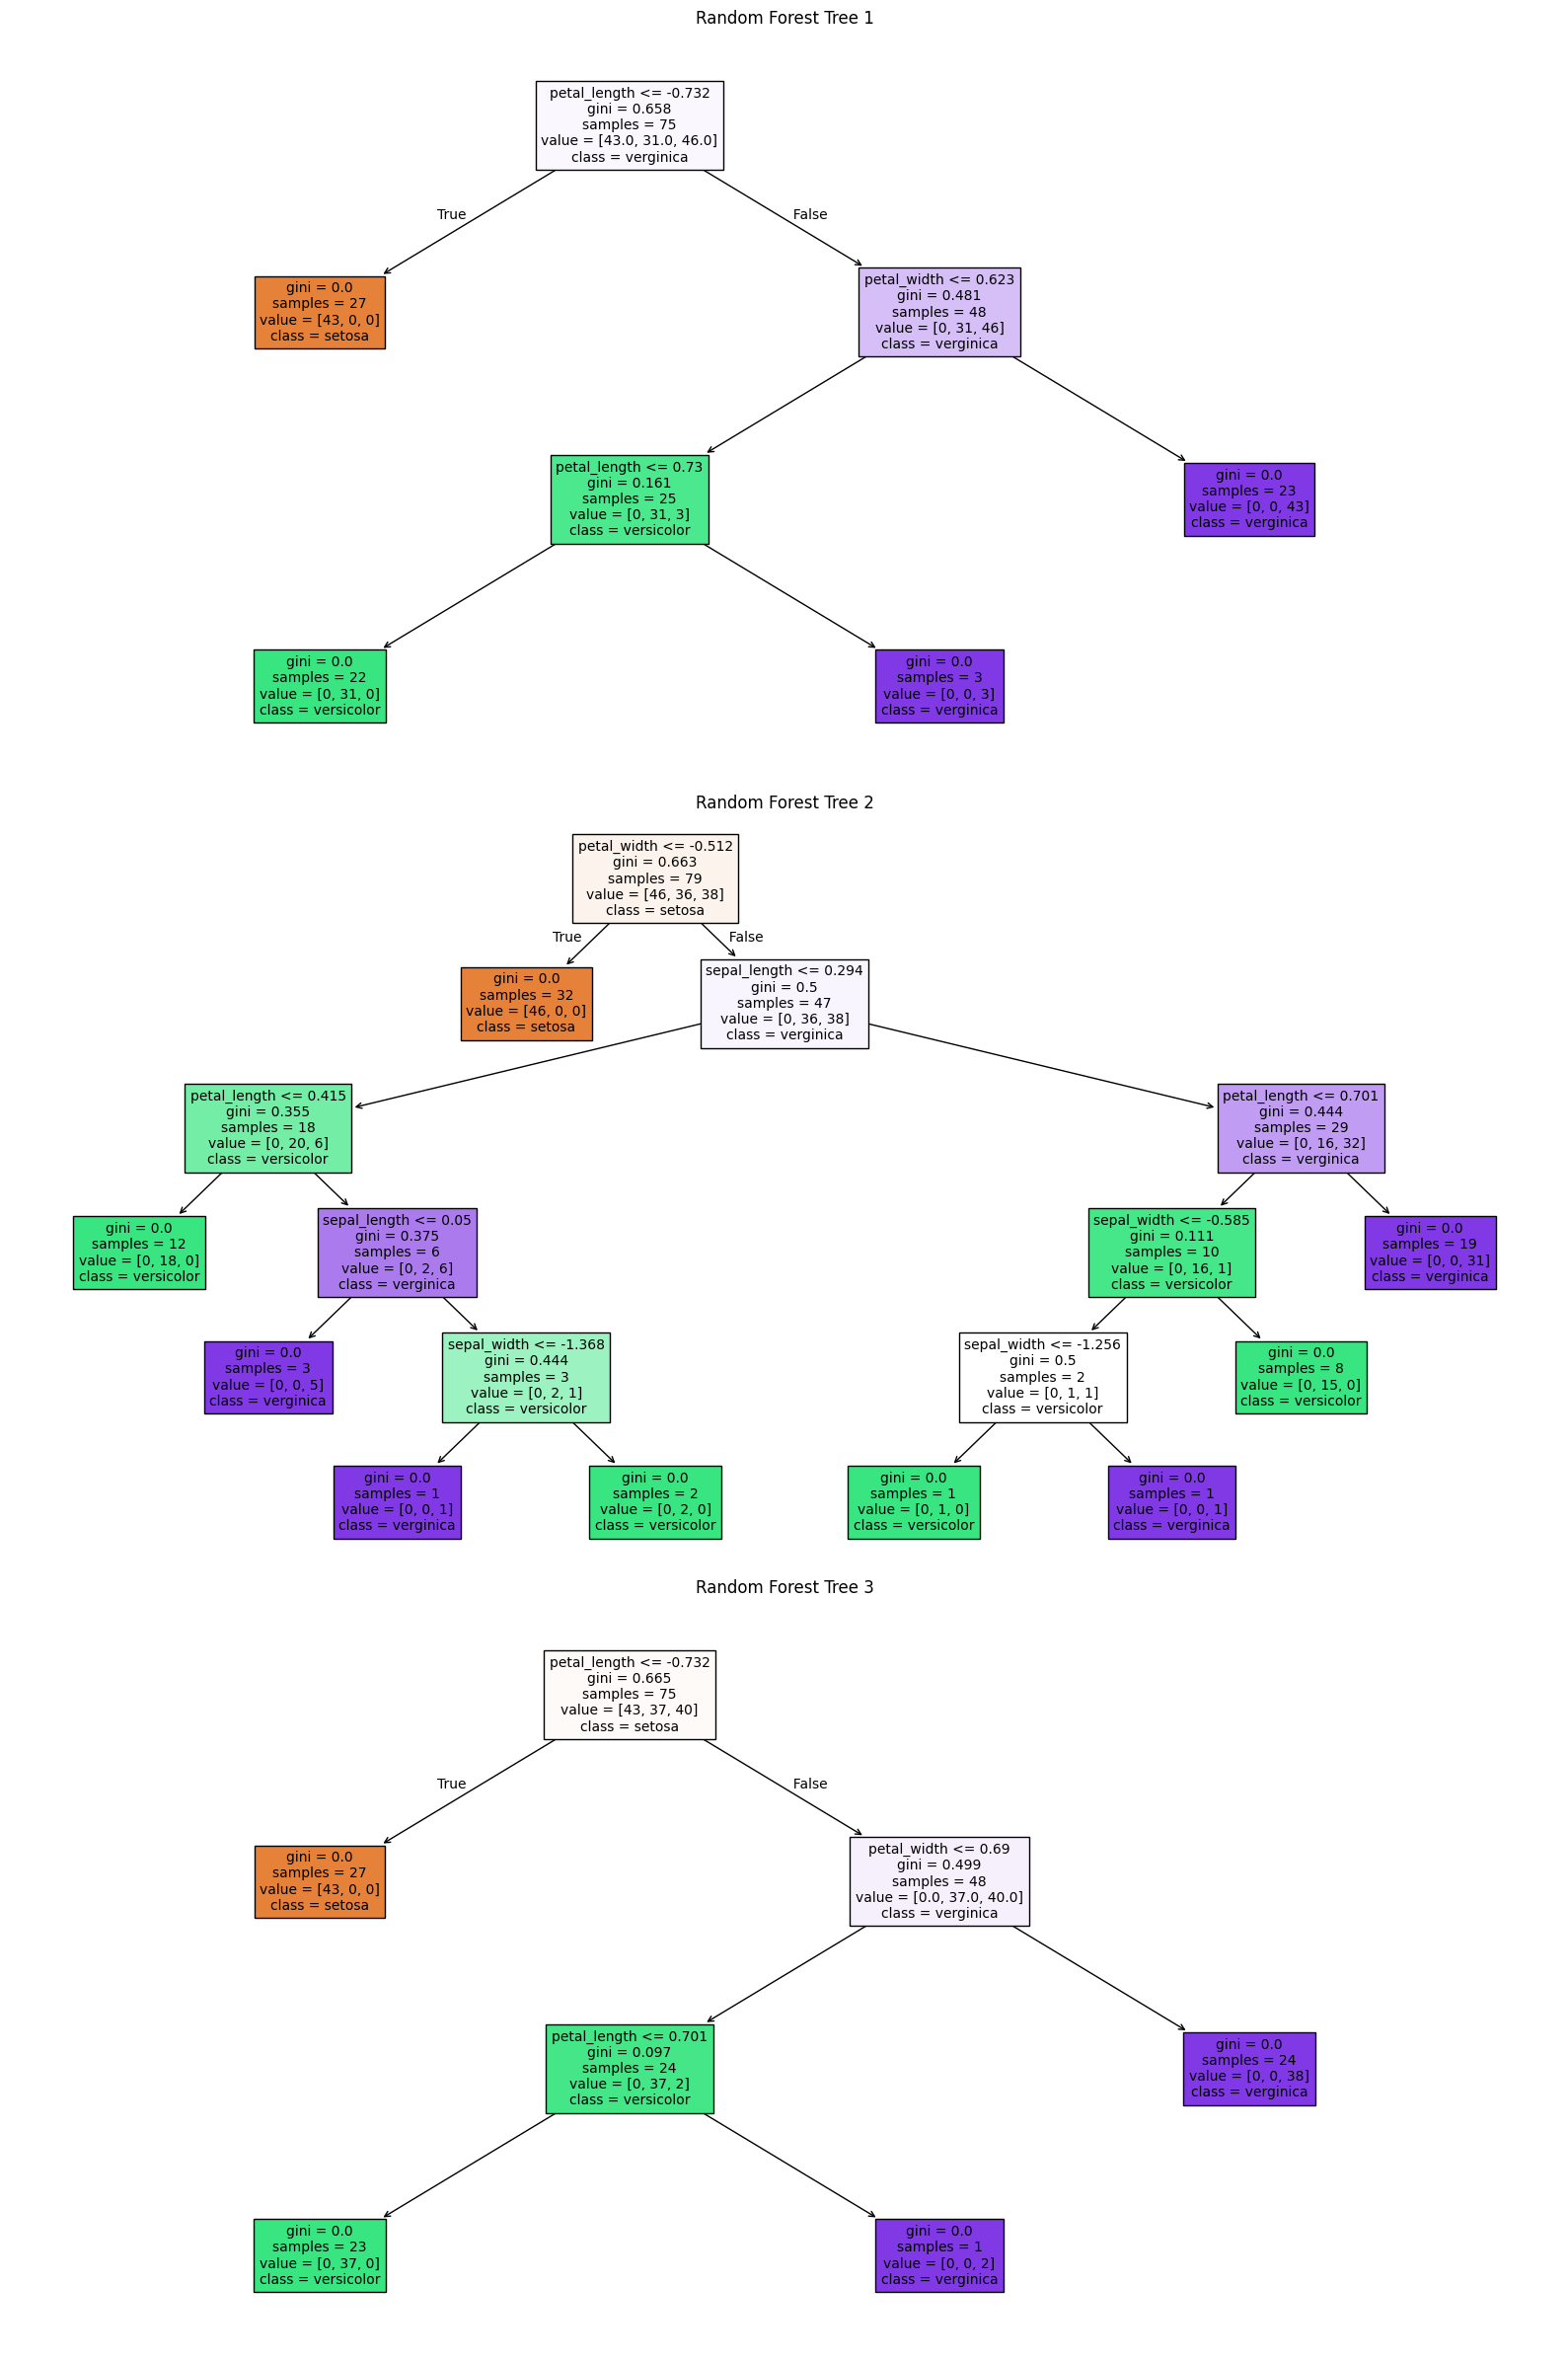

In [79]:
no_of_trees = 3
plt.figure(figsize=(16,8 *  no_of_trees))
for i in range (no_of_trees):
    plt.subplot(no_of_trees,1,i+1)
    plot_tree(Fmodel.estimators_[i],feature_names=X.columns,class_names=["setosa","versicolor","verginica"],filled=True, fontsize=10)
    plt.title(f"Random Forest Tree {i+1}")
plt.tight_layout()

In [83]:
cv_score_dt = cross_val_score(DTmodel,X,y,cv=5,scoring="accuracy")
cv_score_rf = cross_val_score(Fmodel,X,y,cv=5,scoring="accuracy")

In [84]:
print("\nDecision Tree CV Scores:", cv_score_dt)
print("Random Forest CV Scores:", cv_score_rf)


Decision Tree CV Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Random Forest CV Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


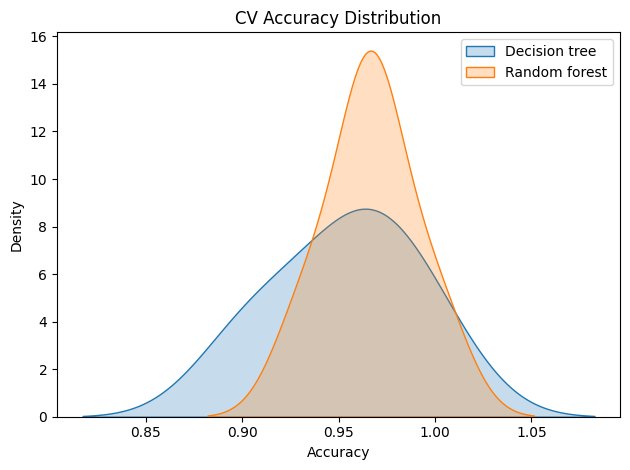

In [87]:
sns.kdeplot(cv_score_dt,fill=True,label="Decision tree")
sns.kdeplot(cv_score_rf,fill=True,label="Random forest")
plt.title("CV Accuracy Distribution")
plt.xlabel("Accuracy")
plt.legend()
plt.tight_layout()